# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


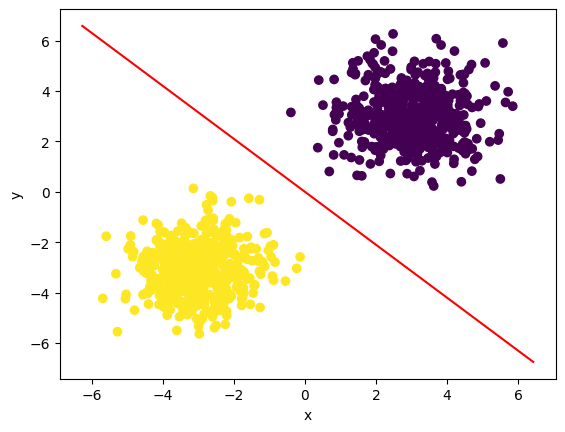

In [14]:
df = pd.read_csv('two_class.csv')

X = df[['x', 'y']] 
y = df['class']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")


plt.scatter(df['x'], df['y'], c=df['class'], cmap='viridis')
slope = -model.coef_[0][0] / model.coef_[0][1]
intercept = -model.intercept_ / model.coef_[0][1]
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('x')
plt.ylabel('y')

plt.show()




Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


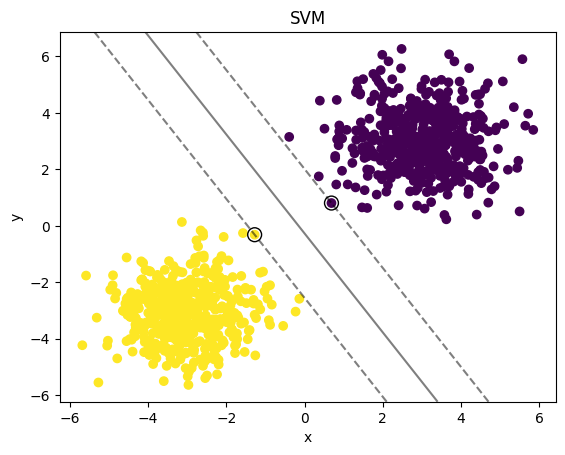

In [15]:
df = pd.read_csv('two_class.csv')

X = df[['x', 'y']]  
y = df['class']     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = SVC(kernel='linear') 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")


plt.scatter(df['x'], df['y'], c=df['class'], cmap='viridis')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVM')
plt.show()


In [17]:
df = pd.read_csv('two_class.csv')

X = df[['x', 'y']]  
y = df['class']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = RandomForestClassifier(n_estimators=10, random_state=1) 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")




Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


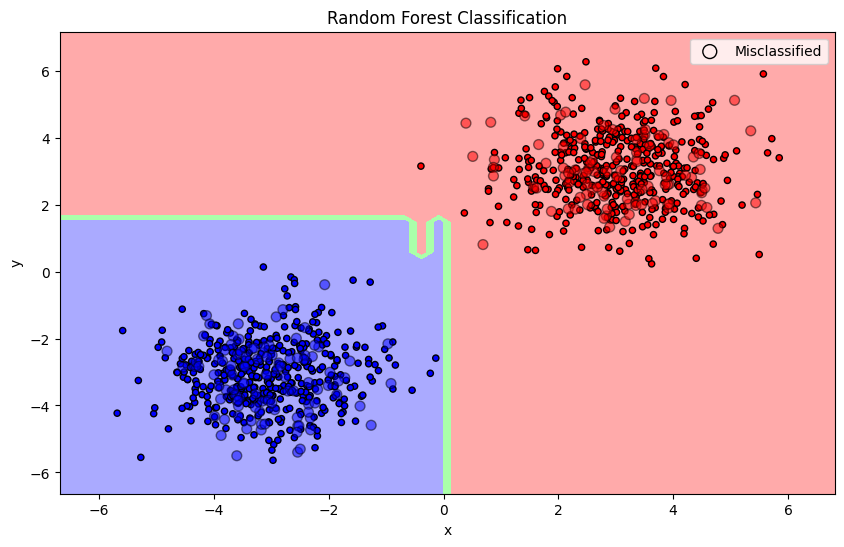

In [3]:
h = 0.3
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train['x'], X_train['y'], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.scatter(X_test['x'], X_test['y'], c=y_pred, cmap=cmap_bold, alpha=0.5, edgecolor='k', s=50)

errors = (y_pred != y_test)
plt.scatter(X_test[errors]['x'], X_test[errors]['y'], facecolors='none', edgecolor='black', s=100, label='Misclassified')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Random Forest Classification')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# code

**Аналіз отриманих результатів**:

1. всі три моделі (логістична регресія knn та рандом форест) справились зі своїм завданням



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [21]:
df2 = pd.read_csv('three_class.csv')

X = df2[['x', 'y']]
y = df2['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")




Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-score: 0.88


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


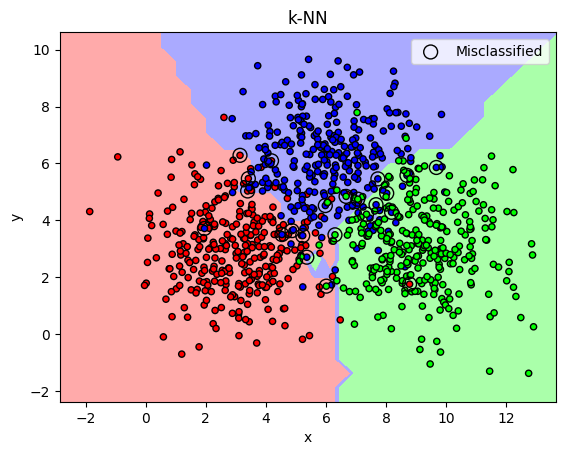

In [22]:
h = 0.5  
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X['x'], X['y'], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('k-NN')
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X_test[y_pred != y_test]['x'], X_test[y_pred != y_test]['y'], 
            facecolors='none', edgecolor='black', s=100, label='Misclassified')

plt.legend()
plt.show()


In [23]:
df2 = pd.read_csv('three_class.csv')

X = df2[['x', 'y']]  
y = df2['class']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = RandomForestClassifier(n_estimators=60, random_state=1) 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")










Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


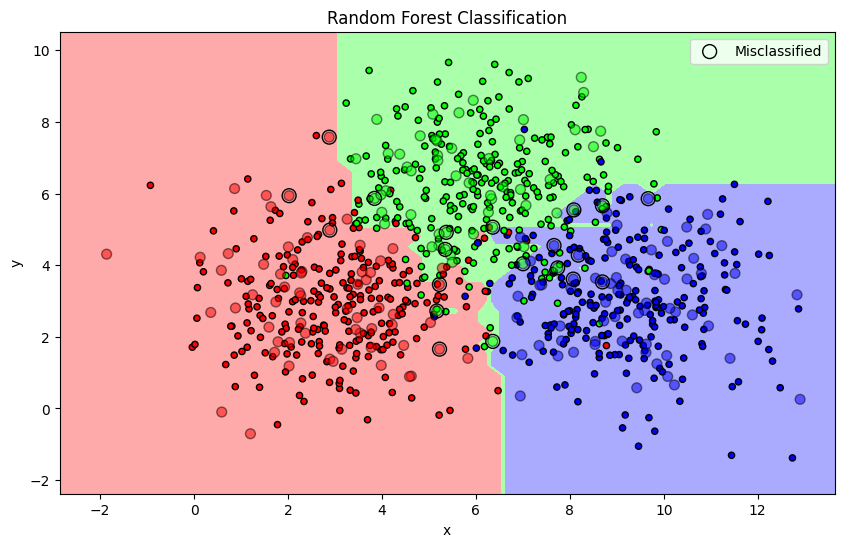

In [7]:
h = 0.3
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train['x'], X_train['y'], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.scatter(X_test['x'], X_test['y'], c=y_pred, cmap=cmap_bold, alpha=0.5, edgecolor='k', s=50)

errors = (y_pred != y_test)
plt.scatter(X_test[errors]['x'], X_test[errors]['y'], facecolors='none', edgecolor='black', s=100, label='Misclassified')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Random Forest Classification')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

accuracy: 0.89


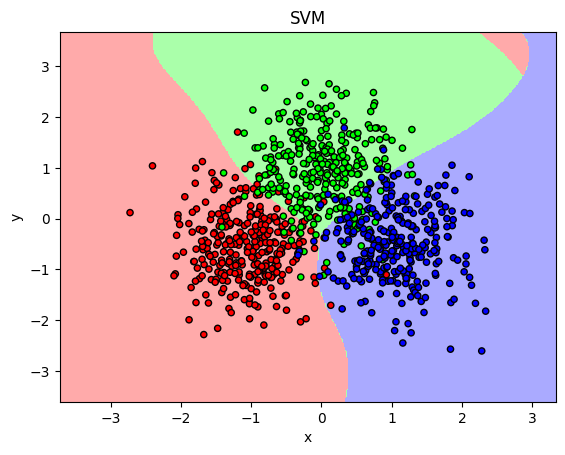

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89


In [24]:
df2 = pd.read_csv('three_class.csv')
X = df2[['x', 'y']]
y = df2['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.2f}")

h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")


**Аналіз отриманих результатів**:
всі три модельки впорались непогано але не ідеально, що є логічно адже класи накладались один на одного

**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [25]:
df3 = pd.read_csv('torus_dataset.csv')

X = df3[['x', 'y']]  
y = df3['class']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = RandomForestClassifier(n_estimators=10, random_state=1) 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


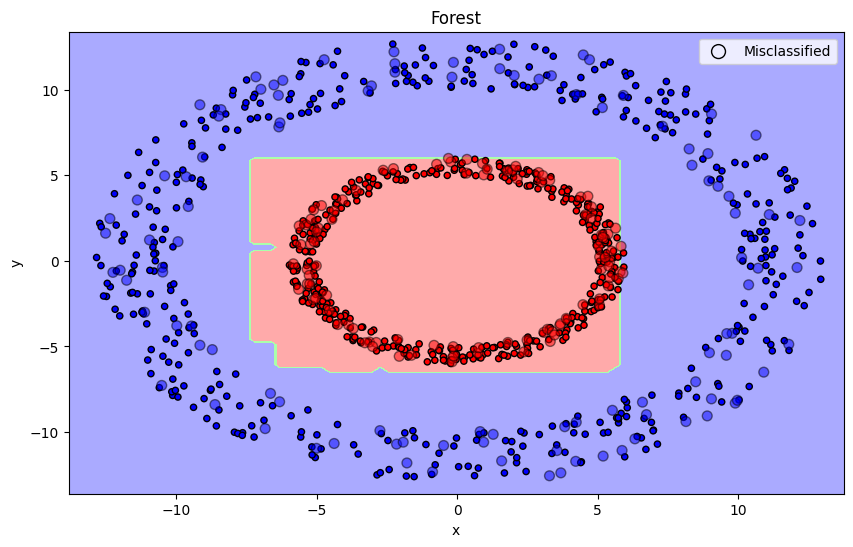

In [26]:
h = 0.3
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train['x'], X_train['y'], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.scatter(X_test['x'], X_test['y'], c=y_pred, cmap=cmap_bold, alpha=0.5, edgecolor='k', s=50)

errors = (y_pred != y_test)
plt.scatter(X_test[errors]['x'], X_test[errors]['y'], facecolors='none', edgecolor='black', s=100, label='Misclassified')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Forest')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [28]:
df3 = pd.read_csv('torus_dataset.csv')

X = df3[['x', 'y']]
y = df3['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


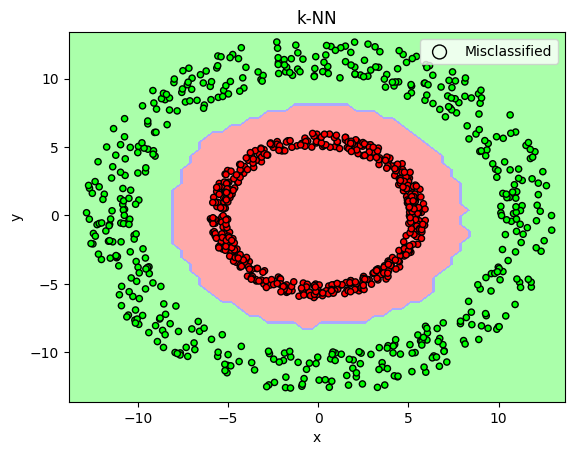

In [29]:
h = 0.5  
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X['x'], X['y'], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('k-NN')
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X_test[y_pred != y_test]['x'], X_test[y_pred != y_test]['y'], 
            facecolors='none', edgecolor='black', s=100, label='Misclassified')

plt.legend()
plt.show()


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


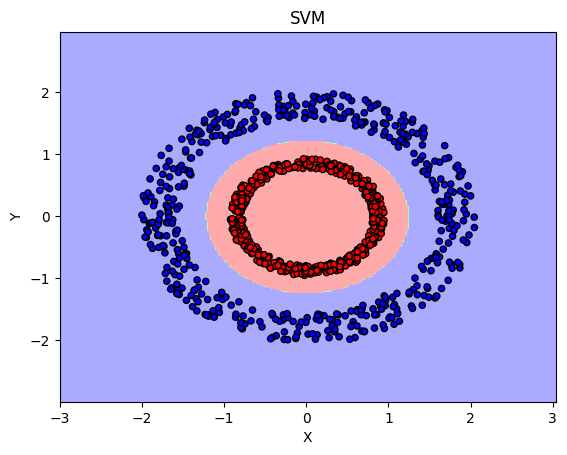

In [40]:
df3 = pd.read_csv('torus_dataset.csv')
X = df3[['x', 'y']]
y = df3['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")

h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
# code

**Аналіз отриманих результатів**:

1.   всі три модельки впорались добре


**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [32]:
df4 = pd.read_csv('double_spiral_dataset.csv')

X = df4[['x', 'y']]  
y = df4['class']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = RandomForestClassifier(n_estimators=40, random_state=1) 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")



Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


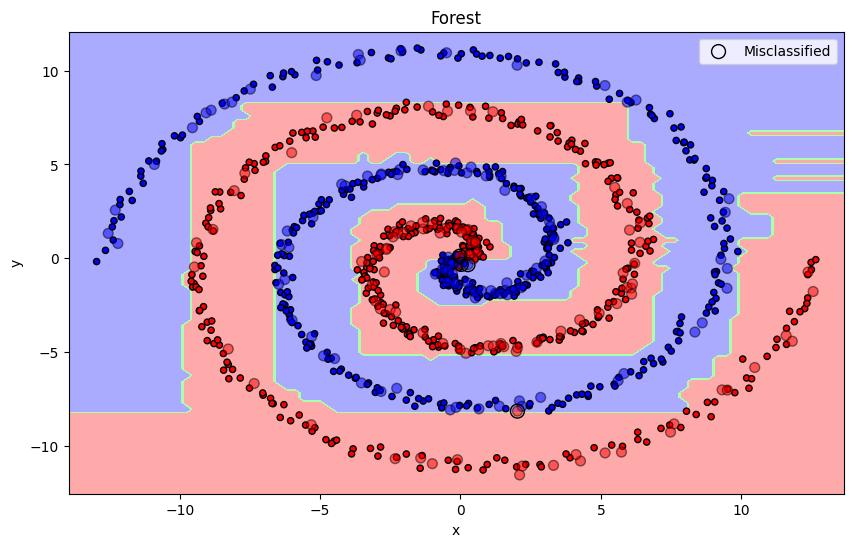

In [56]:
h = 0.3
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train['x'], X_train['y'], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.scatter(X_test['x'], X_test['y'], c=y_pred, cmap=cmap_bold, alpha=0.5, edgecolor='k', s=50)

errors = (y_pred != y_test)
plt.scatter(X_test[errors]['x'], X_test[errors]['y'], facecolors='none', edgecolor='black', s=100, label='Misclassified')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Forest')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [34]:
df4 = pd.read_csv('double_spiral_dataset.csv')

X = df4[['x', 'y']]
y = df4['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


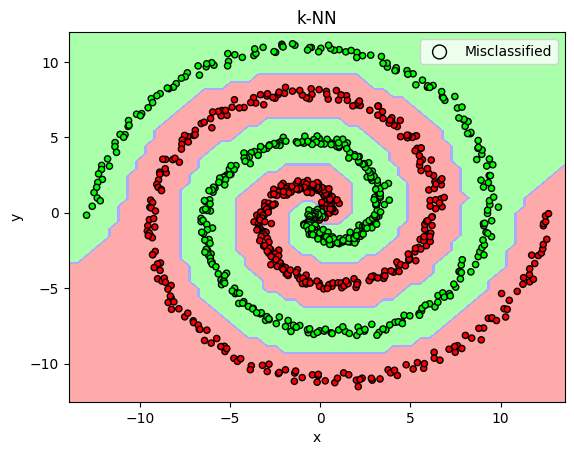

In [35]:
h = 0.5  
x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X['x'], X['y'], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('k-NN')
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X_test[y_pred != y_test]['x'], X_test[y_pred != y_test]['y'], 
            facecolors='none', edgecolor='black', s=100, label='Misclassified')

plt.legend()
plt.show()


Accuracy: 0.66
Precision: 0.66
Recall: 0.66
F1-score: 0.66


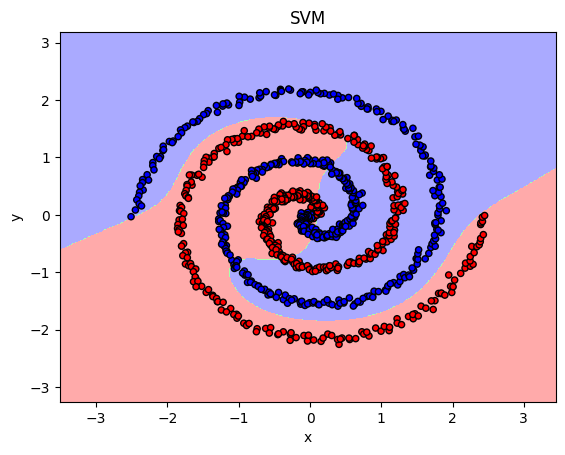

In [39]:

df4 = pd.read_csv('double_spiral_dataset.csv')
X = df4[['x', 'y']]
y = df4['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')  
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")

h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
# code

**Аналіз отриманих результатів**:

всі модельки крім svm впорались непогано. svm не підходить для вирішення задачі з подвійною спіралькою але мені було лінький шукати щось інше. вибачте будь ласка :с